In [417]:
#Basic libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [418]:
#Loading dataset
data=pd.read_csv(r'salarydata.csv')

# Basic Details of dataset

In [419]:
data.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [420]:
data.tail()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
32556,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [421]:
data.shape

(32561, 14)

In [422]:
data.describe()

,age,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,10.080679,1077.648844,87.303830,40.437456
std,13.640433,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.000000,0.000000,0.000000,1.000000
25%,28.000000,9.000000,0.000000,0.000000,40.000000
50%,37.000000,10.000000,0.000000,0.000000,40.000000
75%,48.000000,12.000000,0.000000,0.000000,45.000000
max,90.000000,16.000000,99999.000000,4356.000000,99.000000


In [423]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   education       32561 non-null  object
 3   education-num   32561 non-null  int64 
 4   marital-status  32561 non-null  object
 5   occupation      32561 non-null  object
 6   relationship    32561 non-null  object
 7   race            32561 non-null  object
 8   sex             32561 non-null  object
 9   capital-gain    32561 non-null  int64 
 10  capital-loss    32561 non-null  int64 
 11  hours-per-week  32561 non-null  int64 
 12  native-country  32561 non-null  object
 13  salary          32561 non-null  object
dtypes: int64(5), object(9)
memory usage: 3.5+ MB


In [424]:
data.kurt()

age                -0.166127
education-num       0.623444
capital-gain      154.799438
capital-loss       20.376802
hours-per-week      2.916687
dtype: float64

In [425]:
data.skew()

age                0.558743
education-num     -0.311676
capital-gain      11.953848
capital-loss       4.594629
hours-per-week     0.227643
dtype: float64

In [426]:
#check for missing values
data.isna().sum()

age               0
workclass         0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [427]:
data.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'salary'],
      dtype='object')

In [428]:
for i in data.columns:
    print(i)
    print(data[i].value_counts())
    print( )

age
36    898
31    888
34    886
23    877
35    876
     ... 
83      6
85      3
88      3
87      1
86      1
Name: age, Length: 73, dtype: int64

workclass
Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

education
HS-grad         10501
Some-college     7291
Bachelors        5355
Masters          1723
Assoc-voc        1382
11th             1175
Assoc-acdm       1067
10th              933
7th-8th           646
Prof-school       576
9th               514
12th              433
Doctorate         413
5th-6th           333
1st-4th           168
Preschool          51
Name: education, dtype: int64

education-num
9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333

In [429]:
data['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [430]:
#Replacing the '?' with mode value
data['workclass']=data['workclass'].replace('?','Private')

In [431]:
data['workclass'].value_counts()

Private             24532
Self-emp-not-inc     2541
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [432]:
data['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

In [433]:
data['occupation']=data['occupation'].replace('?','Prof-specialty')

In [434]:
data['native-country'].value_counts()

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                      

In [435]:
data['native-country']=data['native-country'].replace('?','United-States')

# Checking outliers

In [436]:
data.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'salary'],
      dtype='object')

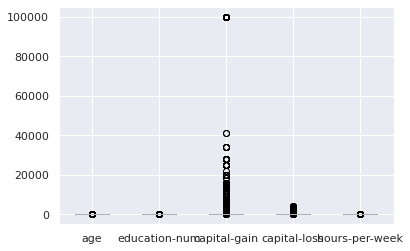

In [437]:
data.boxplot(column=['age','education-num','capital-gain','capital-loss', 'hours-per-week'])

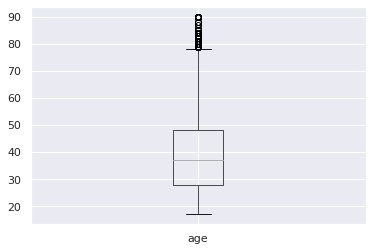

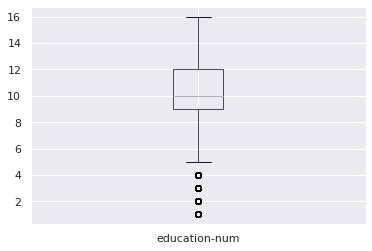

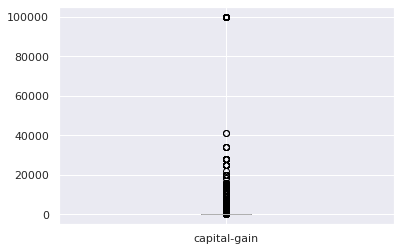

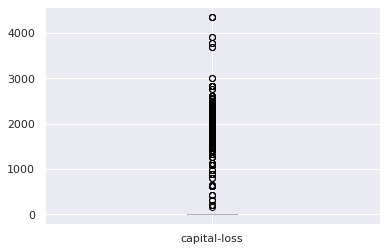

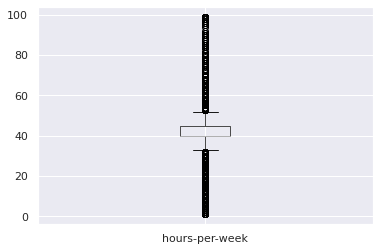

In [438]:
#Outlier checking using box plot
for i in ['age','education-num','capital-gain',
       'capital-loss', 'hours-per-week']:
    plt.figure()
    data.boxplot([i])

# Outlier handling

In [439]:
#Outlier handling - Age
Q1=np.percentile(data['age'],25,interpolation='midpoint')
Q2=np.percentile(data['age'],50,interpolation='midpoint')
Q3=np.percentile(data['age'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

28.0
37.0
48.0
-2.0
78.0


In [440]:
outlier=[]
for x in data['age']:
    if((x>up_lim)) or ((x<low_lim)):
        outlier.append(x)
outlier        

[79,
 90,
 80,
 81,
 90,
 88,
 90,
 90,
 80,
 90,
 81,
 82,
 79,
 81,
 80,
 83,
 90,
 90,
 79,
 81,
 90,
 90,
 80,
 90,
 90,
 79,
 79,
 84,
 90,
 80,
 90,
 81,
 83,
 84,
 81,
 79,
 85,
 82,
 79,
 80,
 90,
 90,
 90,
 84,
 80,
 90,
 90,
 79,
 84,
 90,
 79,
 90,
 90,
 90,
 82,
 81,
 90,
 84,
 79,
 81,
 82,
 81,
 80,
 90,
 80,
 84,
 82,
 79,
 90,
 84,
 90,
 83,
 79,
 81,
 80,
 79,
 80,
 79,
 80,
 90,
 90,
 80,
 90,
 90,
 81,
 83,
 82,
 90,
 90,
 81,
 80,
 80,
 90,
 79,
 80,
 82,
 85,
 80,
 79,
 90,
 81,
 79,
 80,
 79,
 81,
 82,
 88,
 90,
 82,
 88,
 84,
 83,
 79,
 86,
 90,
 90,
 82,
 83,
 81,
 79,
 90,
 80,
 81,
 79,
 84,
 84,
 79,
 90,
 80,
 81,
 81,
 81,
 90,
 87,
 90,
 80,
 80,
 82,
 90,
 90,
 85,
 82,
 81]

In [441]:
ind1=(data['age']>up_lim)|(data['age']<low_lim)
data.loc[ind1].index

Int64Index([   74,   222,   430,   918,  1040,  1168,  1935,  2303,  2754,
             2891,
            ...
            31432, 31696, 31814, 31836, 31855, 32277, 32367, 32459, 32494,
            32525],
           dtype='int64', length=143)

Text(0.5, 1.0, 'age')

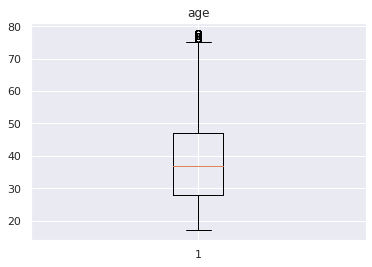

In [442]:
data.drop(data.loc[ind1].index,inplace=True)
plt.boxplot(data['age'])
plt.title('age')

In [443]:
#Outlier handling - education-num
Q1=np.percentile(data['education-num'],25,interpolation='midpoint')
Q2=np.percentile(data['education-num'],50,interpolation='midpoint')
Q3=np.percentile(data['education-num'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

9.0
10.0
12.0
4.5
16.5


In [444]:
outlier=[]
for x in data['education-num']:
    if((x>up_lim)) or ((x<low_lim)):
        outlier.append(x)
outlier       

[4,
 3,
 4,
 4,
 2,
 4,
 3,
 4,
 2,
 1,
 4,
 4,
 3,
 3,
 3,
 4,
 2,
 2,
 2,
 3,
 3,
 2,
 4,
 4,
 4,
 3,
 4,
 4,
 3,
 3,
 4,
 3,
 2,
 1,
 4,
 4,
 4,
 4,
 2,
 2,
 3,
 3,
 4,
 3,
 4,
 3,
 4,
 4,
 3,
 2,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 2,
 4,
 4,
 4,
 4,
 3,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 3,
 4,
 4,
 2,
 2,
 3,
 3,
 4,
 3,
 2,
 4,
 4,
 3,
 3,
 2,
 2,
 4,
 3,
 4,
 1,
 4,
 1,
 4,
 4,
 4,
 3,
 3,
 4,
 3,
 4,
 4,
 2,
 4,
 3,
 4,
 3,
 3,
 3,
 1,
 4,
 4,
 4,
 4,
 4,
 1,
 4,
 4,
 4,
 3,
 3,
 4,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 3,
 2,
 4,
 4,
 4,
 1,
 3,
 4,
 4,
 4,
 4,
 2,
 2,
 4,
 4,
 4,
 2,
 4,
 4,
 3,
 4,
 4,
 4,
 4,
 2,
 4,
 4,
 4,
 3,
 4,
 3,
 3,
 3,
 4,
 2,
 4,
 4,
 2,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 3,
 4,
 3,
 4,
 3,
 4,
 3,
 4,
 2,
 3,
 3,
 4,
 4,
 3,
 3,
 4,
 2,
 4,
 3,
 2,
 2,
 4,
 4,
 2,
 2,
 4,
 4,
 2,
 2,
 3,
 3,
 3,
 4,
 3,
 4,
 4,
 4,
 4,
 4,
 1,
 3,
 4,
 4,
 4,
 4,
 3,
 4,
 4,
 4,
 1,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 4,
 1,
 3,
 4,
 1,
 4,
 4,
 2,
 4,
 2,


In [445]:
ind1=(data['education-num']>up_lim)|(data['education-num']<low_lim)
data.loc[ind1].index

Int64Index([   15,    56,    61,    79,   160,   183,   195,   214,   221,
              224,
            ...
            32401, 32403, 32413, 32425, 32430, 32431, 32432, 32448, 32479,
            32517],
           dtype='int64', length=1177)

Text(0.5, 1.0, 'education-num')

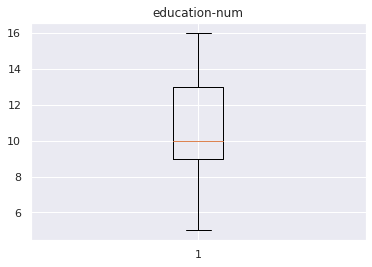

In [446]:
data.drop(data.loc[ind1].index,inplace=True)
plt.boxplot(data['education-num'])
plt.title('education-num')

In [447]:
#Outlier handling - hours-per-week
Q1=np.percentile(data['hours-per-week'],25,interpolation='midpoint')
Q2=np.percentile(data['hours-per-week'],50,interpolation='midpoint')
Q3=np.percentile(data['hours-per-week'],75,interpolation='midpoint')
print(Q1)
print(Q2)
print(Q3)
IQR=Q3-Q1
low_lim=Q1-1.5*IQR
up_lim=Q3+1.5*IQR
print(low_lim)
print(up_lim)

40.0
40.0
45.0
32.5
52.5


In [448]:
outlier=[]
for x in data['hours-per-week']:
    if((x>up_lim)) or ((x<low_lim)):
        outlier.append(x)
outlier        

[13,
 16,
 80,
 30,
 60,
 20,
 60,
 80,
 15,
 25,
 30,
 60,
 55,
 60,
 58,
 32,
 70,
 2,
 22,
 30,
 25,
 60,
 60,
 32,
 25,
 56,
 60,
 28,
 60,
 60,
 20,
 30,
 30,
 24,
 24,
 2,
 60,
 16,
 20,
 25,
 12,
 65,
 1,
 28,
 24,
 55,
 60,
 12,
 60,
 55,
 20,
 10,
 20,
 55,
 70,
 20,
 20,
 60,
 30,
 20,
 30,
 60,
 12,
 75,
 24,
 24,
 98,
 15,
 60,
 56,
 16,
 60,
 80,
 25,
 54,
 25,
 15,
 24,
 10,
 15,
 55,
 60,
 30,
 20,
 8,
 25,
 25,
 30,
 24,
 55,
 15,
 15,
 10,
 10,
 30,
 25,
 6,
 16,
 55,
 64,
 65,
 25,
 24,
 60,
 19,
 30,
 18,
 60,
 72,
 25,
 60,
 28,
 5,
 55,
 60,
 20,
 60,
 16,
 60,
 24,
 6,
 30,
 20,
 20,
 20,
 60,
 60,
 25,
 20,
 20,
 8,
 20,
 24,
 80,
 58,
 9,
 8,
 20,
 32,
 55,
 60,
 12,
 70,
 25,
 30,
 24,
 60,
 80,
 25,
 28,
 21,
 60,
 20,
 60,
 32,
 55,
 20,
 20,
 24,
 55,
 60,
 64,
 26,
 60,
 60,
 14,
 60,
 60,
 55,
 15,
 20,
 32,
 15,
 60,
 25,
 20,
 10,
 16,
 5,
 55,
 30,
 20,
 20,
 60,
 20,
 30,
 65,
 25,
 15,
 60,
 20,
 59,
 24,
 15,
 20,
 25,
 72,
 20,
 20,
 18,
 70,
 55,
 

In [449]:
ind1=(data['hours-per-week']>up_lim)|(data['hours-per-week']<low_lim)
data.loc[ind1].index

Int64Index([    1,     6,    10,    12,    20,    21,    27,    28,    34,
               37,
            ...
            32532, 32536, 32539, 32541, 32542, 32544, 32545, 32548, 32553,
            32559],
           dtype='int64', length=8592)

Text(0.5, 1.0, 'hours-per-week')

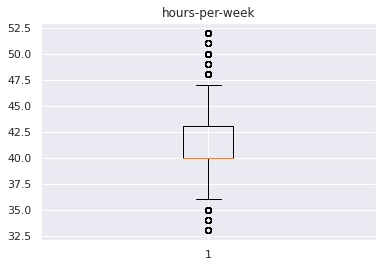

In [450]:
data.drop(data.loc[ind1].index,inplace=True)
plt.boxplot(data['hours-per-week'])
plt.title('hours-per-week')

In [451]:
data.shape

(22649, 14)

# Insight using visualizations

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


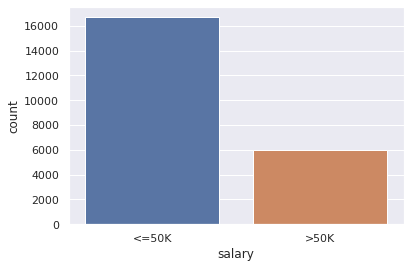

In [452]:
#Salary distribution
sns.countplot(data["salary"])
#Inferance: Employees with salary <=50 thousand comprises more when compared to employees with >50 thousand salary.

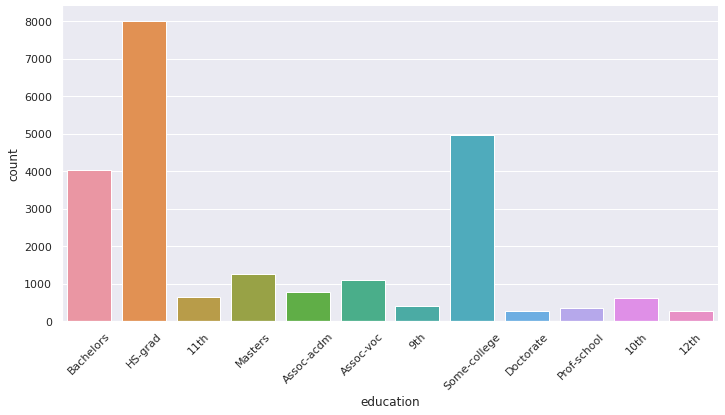

In [453]:
#Education distribution
sns.set(style="darkgrid")
graph=sns.catplot(x="education",kind="count",data=data,height=5,aspect=2)
graph.set_xticklabels(rotation=45)
#The above figure provides the information that HS-grade has maximum count of all other educations and  pre-school has the minimum .

The above figure provides the information that HS-grade has maximum count of all other educations and  pre-school has
the minimum .

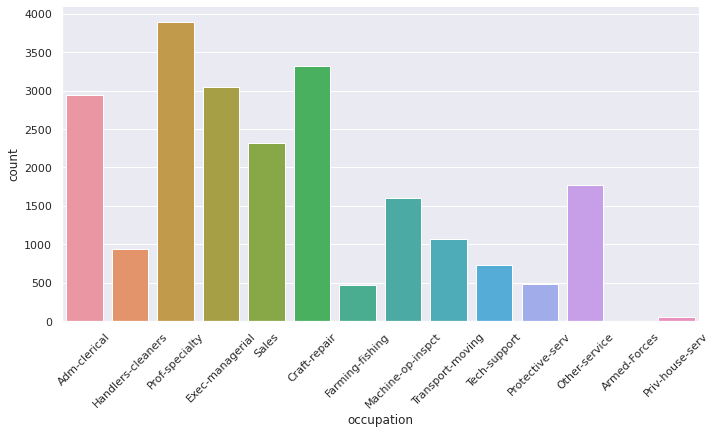

In [454]:
#Occupation distribution
sns.set(style="darkgrid")
graph=sns.catplot(x="occupation",kind="count",data=data,height=5,aspect=2)
graph.set_xticklabels(rotation=45)
#Inference obtained is Prof-speciality scores more in count than other occupations and armed-forces is the least amoung them.

Inference obtained is Prof-speciality scores more in count than other occupations and armed-forces is the least amoung them.

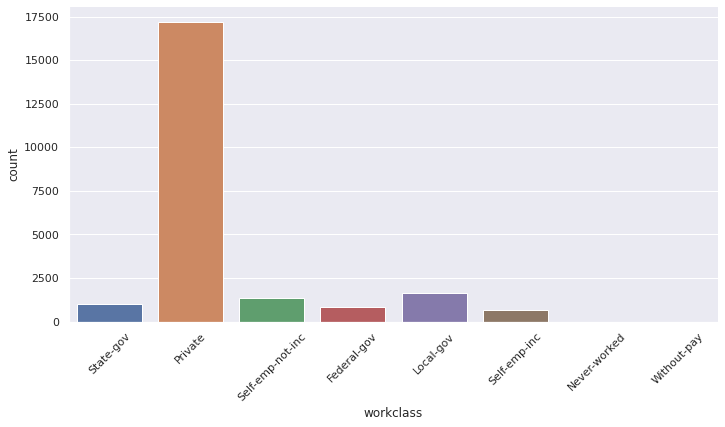

In [455]:
#Workclass distribution 
sns.set(style="darkgrid")
graph=sns.catplot(x="workclass",kind="count",data=data,height=5,aspect=2)
graph.set_xticklabels(rotation=45)
#Most of the employees belongs to Private workclass and the least amoung them are without pay and never worked.

Most of the employees belongs to Private workclass and the least amoung them are without pay and never worked.

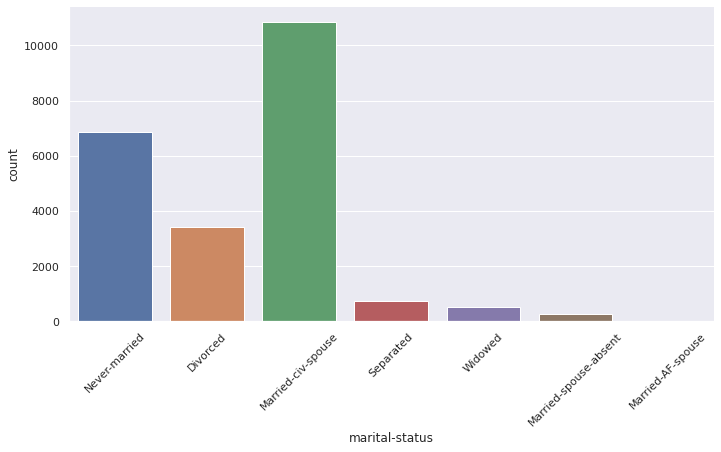

In [456]:
#Marital-status distribution
sns.set(style="darkgrid")
graph=sns.catplot(x="marital-status",kind="count",data=data,height=5,aspect=2)
graph.set_xticklabels(rotation=45)
#Married-civ-spounse is the lead in count and married=af-spounce, the least in count.

Married-civ-spounse is the lead in count and married=af-spounce, the least in count.

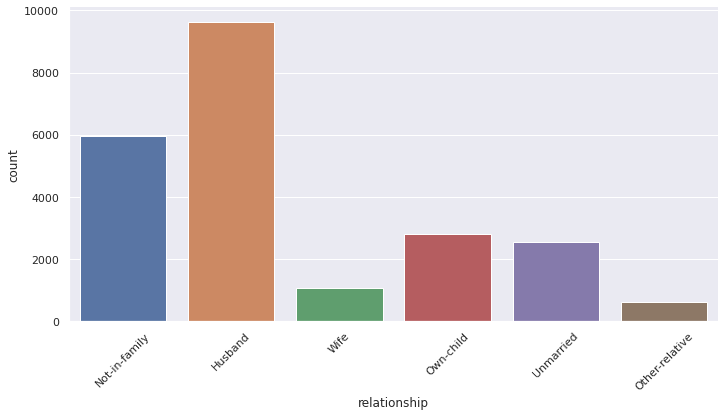

In [457]:
#Relationship distribution
sns.set(style="darkgrid")
graph=sns.catplot(x="relationship",kind="count",data=data,height=5,aspect=2)
graph.set_xticklabels(rotation=45)
#In relationship attribute distribution, husband is maximum and other relative is minimum.

In relationship attribute distribution, husband is maximum and other relative is minimum.

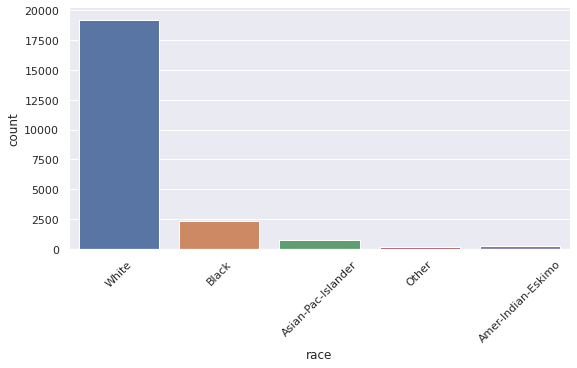

In [458]:
#Race distribution
sns.set(style="darkgrid")
graph=sns.catplot(x="race",kind="count",data=data,height=4,aspect=2)
graph.set_xticklabels(rotation=45)
#Here,white people are large in number and other categories are least in number.

In [459]:
data['race'].value_counts()

White                 19198
Black                  2340
Asian-Pac-Islander      725
Amer-Indian-Eskimo      217
Other                   169
Name: race, dtype: int64

Here,white people are large in number and other categories are least in number.

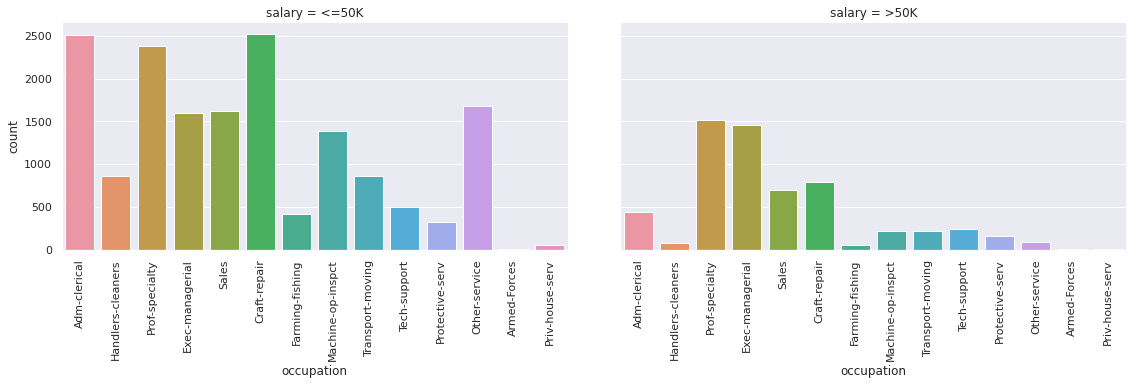

In [460]:
#salary distribution among diffrent occupation
sns.set(style="darkgrid")
graph=sns.catplot(x="occupation",kind="count",data=data,col="salary",col_wrap=2,height=4,aspect=2)
graph.set_xticklabels(rotation=90)
#Amoung employees with salary <=50k, prof-speciality is the occupation that is leading and armed forces is the one that is backing.
#Amoung employes with >50k salary, prof-seciality leads whereas armed forces and private-income-sev is the least.

Amoung employees with salary <=50k, prof-speciality is the occupation that is leading and armed forces is the one that is 
backing. Amoung employes with >50k salary, prof-seciality leads whereas armed forces and private-income-sev is the least.

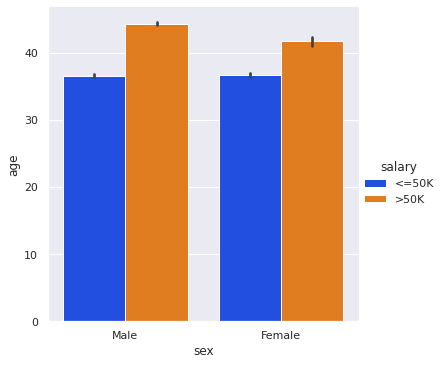

In [461]:
#Salary distribution based on gender
sns.catplot(data=data, kind="bar",x="sex", y="age", hue="salary", palette="bright")
#Amoung male employees those with salary >50k in between an age interval of 40-45 comprises more than those with <=50k salary of 
#age between 35-40.
#Amoung females, those with salary >50k in between an age interval of 40-43 comprises more than those with <=50k salary of
#age between 35-40.

Amoung male employees those with salary >50k in between an age interval of 40-45 comprises more than those with <=50k salary of
age between 35-40.
Amoung females, those with salary >50k in between an age interval of 40-43 comprises more than those with <=50k salary of
age between 35-40.

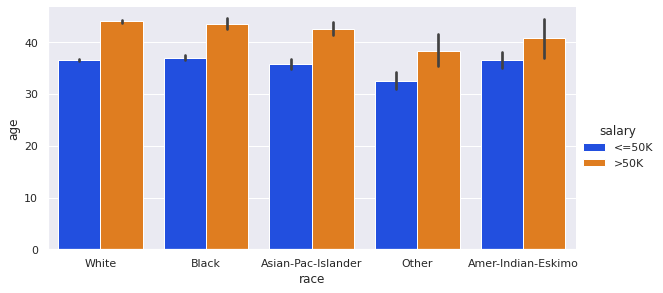

In [462]:
sns.catplot(data=data, kind="bar",x="race", y="age", hue="salary", palette="bright",height=4,aspect=2)

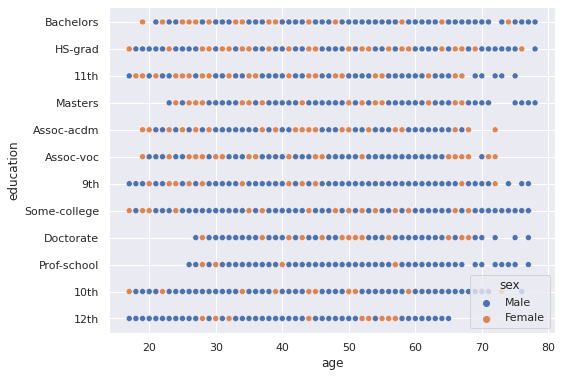

In [463]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="age",y='education',data=data, hue='sex') 
plt.show()

In [464]:
data.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country', 'salary'],
      dtype='object')

In [465]:
#data.duplicated().sum()

In [466]:
#data=data.drop_duplicates()

In [467]:
data.shape

(22649, 14)

# Encoding

In [468]:
for i in data.columns:
    print(i)
    print(data[i].nunique())

age
62
workclass
8
education
12
education-num
12
marital-status
7
occupation
14
relationship
6
race
5
sex
2
capital-gain
104
capital-loss
82
hours-per-week
20
native-country
41
salary
2


In [469]:
#Dropping unnecessary columns
data=data.drop(['education'],axis=1)


In [470]:
#Label encoding
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
for i in ['workclass', 'marital-status','occupation', 'relationship', 'race','native-country', 'salary']:
    data[i] = label_encoder.fit_transform(data[i])

In [471]:
data=pd.get_dummies(data)

In [472]:
data.head()

,age,workclass,education-num,marital-status,occupation,relationship,race,capital-gain,capital-loss,hours-per-week,native-country,salary,sex_Female,sex_Male
0,39,6,13,4,0,1,4,2174,0,40,38,0,0,1
2,38,3,9,0,5,1,4,0,0,40,38,0,0,1
3,53,3,7,2,5,0,2,0,0,40,38,0,0,1
4,28,3,13,2,9,5,2,0,0,40,4,0,1,0
5,37,3,14,2,3,5,4,0,0,40,38,0,1,0


In [473]:
data.columns

Index(['age', 'workclass', 'education-num', 'marital-status', 'occupation',
       'relationship', 'race', 'capital-gain', 'capital-loss',
       'hours-per-week', 'native-country', 'salary', 'sex_Female', 'sex_Male'],
      dtype='object')

In [474]:
data.dtypes

age               int64
workclass         int64
education-num     int64
marital-status    int64
occupation        int64
relationship      int64
race              int64
capital-gain      int64
capital-loss      int64
hours-per-week    int64
native-country    int64
salary            int64
sex_Female        uint8
sex_Male          uint8
dtype: object

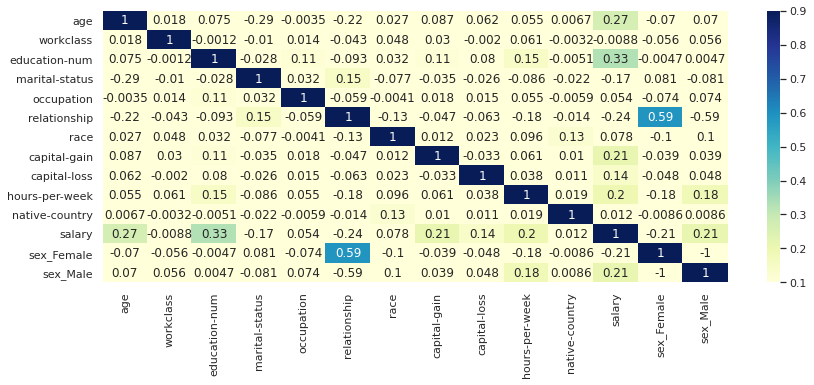

In [475]:
plt.figure(figsize=(14,5))
sns.heatmap(data.corr(),vmin=0.1,vmax=0.9,annot=True, cmap='YlGnBu')

# Splitting

In [476]:
X=data.drop(['salary'],axis=1)
y=pd.DataFrame(data['salary'])

In [477]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42,test_size=0.20)

In [478]:
#standard scaling
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()
X_train=scalar.fit_transform(X_train)
X_test=scalar.fit_transform(X_test)

# Logistic Regression

In [479]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score,recall_score,f1_score

In [480]:
from sklearn.linear_model import LogisticRegression
logit_model=LogisticRegression()
logit_model.fit(X_train,y_train.values.ravel())
y_pred=logit_model.predict(X_test)

In [481]:
from sklearn.metrics import classification_report
print('Accuracy is ',accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
cm=confusion_matrix(y_test,y_pred)
cm

Accuracy is  0.8108167770419427
              precision    recall  f1-score   support

           0       0.83      0.94      0.88      3300
           1       0.74      0.47      0.57      1230

    accuracy                           0.81      4530
   macro avg       0.78      0.70      0.73      4530
weighted avg       0.80      0.81      0.80      4530



array([[3094,  206],
       [ 651,  579]])

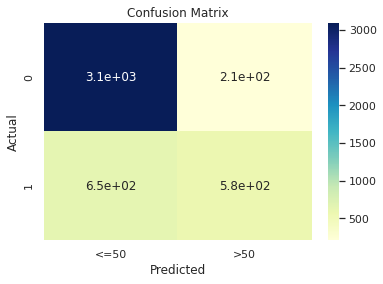

<Figure size 1080x576 with 0 Axes>

In [482]:
ax= plt.subplot()
plt.figure(figsize=(15,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax, cmap = "YlGnBu")

# labels, title and ticks
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_title("Confusion Matrix") 
ax.xaxis.set_ticklabels(["<=50", ">50"])
plt.show()

# KNN

In [483]:
from sklearn.neighbors import KNeighborsClassifier
acc_values=[]
neighbors=np.arange(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='minkowski')
    classifier.fit(X_train,y_train.values.ravel())
    y_pred=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    acc_values.append(acc)

In [484]:
acc_values

[0.804635761589404,
 0.8161147902869758,
 0.819205298013245,
 0.8196467991169978,
 0.8196467991169978,
 0.8233995584988962,
 0.8264900662251655,
 0.8300220750551877,
 0.8317880794701987,
 0.8335540838852097,
 0.8300220750551877,
 0.8304635761589404]

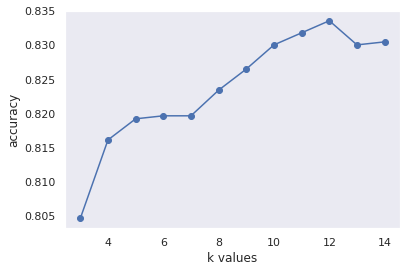

In [485]:
plt.plot(neighbors,acc_values,'o-')
plt.xlabel('k values')
plt.ylabel('accuracy')
plt.grid()         

In [486]:
classifier=KNeighborsClassifier(n_neighbors=12,metric='minkowski')
classifier.fit(X_train,y_train.values.ravel())
y_pred=classifier.predict(X_test)

In [487]:
print('Accuracy is ',accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
cm=confusion_matrix(y_test,y_pred)
cm

Accuracy is  0.8335540838852097
              precision    recall  f1-score   support

           0       0.85      0.93      0.89      3300
           1       0.75      0.57      0.65      1230

    accuracy                           0.83      4530
   macro avg       0.80      0.75      0.77      4530
weighted avg       0.83      0.83      0.83      4530



array([[3071,  229],
       [ 525,  705]])

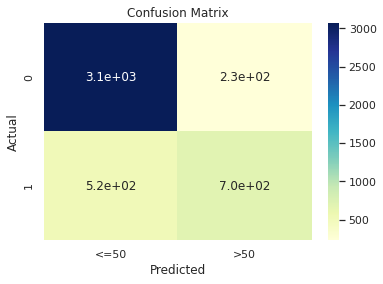

<Figure size 1080x576 with 0 Axes>

In [488]:
ax= plt.subplot()
plt.figure(figsize=(15,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax, cmap = "YlGnBu")

# labels, title and ticks
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_title("Confusion Matrix") 
ax.xaxis.set_ticklabels(["<=50", ">50"])
plt.show()

# Decision Tree

In [489]:
from sklearn.tree import DecisionTreeClassifier
dt_model=DecisionTreeClassifier()
dt_model.fit(X_train,y_train.values.ravel())
y_pred=dt_model.predict(X_test)

In [490]:
print('Accuracy is ',accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
cm=confusion_matrix(y_test,y_pred)
cm

Accuracy is  0.7947019867549668
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      3300
           1       0.62      0.62      0.62      1230

    accuracy                           0.79      4530
   macro avg       0.74      0.74      0.74      4530
weighted avg       0.79      0.79      0.79      4530



array([[2843,  457],
       [ 473,  757]])

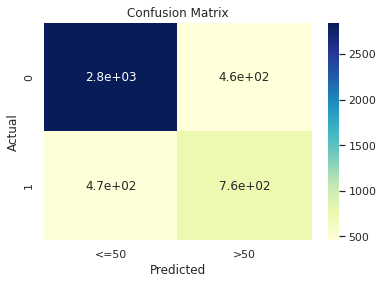

<Figure size 1080x576 with 0 Axes>

In [491]:
ax= plt.subplot()
plt.figure(figsize=(15,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax, cmap = "YlGnBu")

# labels, title and ticks
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_title("Confusion Matrix") 
ax.xaxis.set_ticklabels(["<=50", ">50"])
plt.show()

# SVM

In [492]:
#linear classifier
from sklearn.svm import SVC
svm_linear=SVC(kernel='linear')
svm_linear.fit(X_train,y_train.values.ravel())
y_pred=svm_linear.predict(X_test)

In [493]:
print('Accuracy is ',accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
cm=confusion_matrix(y_test,y_pred)
cm

Accuracy is  0.7975717439293598
              precision    recall  f1-score   support

           0       0.80      0.97      0.87      3300
           1       0.80      0.34      0.48      1230

    accuracy                           0.80      4530
   macro avg       0.80      0.65      0.68      4530
weighted avg       0.80      0.80      0.77      4530



array([[3192,  108],
       [ 809,  421]])

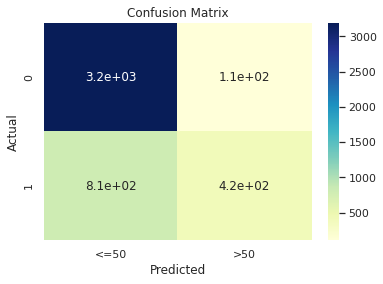

<Figure size 1080x576 with 0 Axes>

In [494]:
ax= plt.subplot()
plt.figure(figsize=(15,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax, cmap = "YlGnBu")

# labels, title and ticks
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_title("Confusion Matrix") 
ax.xaxis.set_ticklabels(["<=50", ">50"])
plt.show()

In [495]:
#polynomial svm
svm_poly=SVC(kernel='poly',degree=3)
svm_poly.fit(X_train,y_train)
y_pred=svm_poly.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [496]:
print('Accuracy is ',accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
cm=confusion_matrix(y_test,y_pred)
cm

Accuracy is  0.8207505518763797
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      3300
           1       0.77      0.48      0.59      1230

    accuracy                           0.82      4530
   macro avg       0.80      0.71      0.74      4530
weighted avg       0.81      0.82      0.81      4530



array([[3125,  175],
       [ 637,  593]])

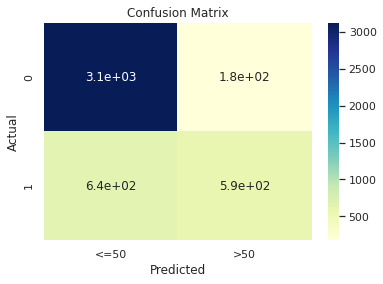

<Figure size 1080x576 with 0 Axes>

In [497]:
ax= plt.subplot()
plt.figure(figsize=(15,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax, cmap = "YlGnBu")

# labels, title and ticks
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_title("Confusion Matrix") 
ax.xaxis.set_ticklabels(["<=50", ">50"])
plt.show()

In [498]:
#radial svm
svm_radial=SVC(kernel='rbf')
svm_radial.fit(X_train,y_train)
y_pred=svm_radial.predict(X_test)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [499]:
print('Accuracy is ',accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
cm=confusion_matrix(y_test,y_pred)
cm

Accuracy is  0.8373068432671081
              precision    recall  f1-score   support

           0       0.85      0.94      0.89      3300
           1       0.78      0.56      0.65      1230

    accuracy                           0.84      4530
   macro avg       0.81      0.75      0.77      4530
weighted avg       0.83      0.84      0.83      4530



array([[3099,  201],
       [ 536,  694]])

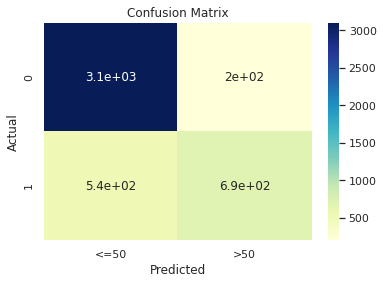

<Figure size 1080x576 with 0 Axes>

In [500]:
ax= plt.subplot()
plt.figure(figsize=(15,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax, cmap = "YlGnBu")

# labels, title and ticks
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_title("Confusion Matrix") 
ax.xaxis.set_ticklabels(["<=50", ">50"])
plt.show()

# Random Forest

In [501]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=100)
clf.fit(X_train,y_train.values.ravel())
y_pred=clf.predict(X_test)

In [502]:
print('Accuracy is ',accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
cm=confusion_matrix(y_test,y_pred)
cm

Accuracy is  0.8300220750551877
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      3300
           1       0.71      0.64      0.67      1230

    accuracy                           0.83      4530
   macro avg       0.79      0.77      0.78      4530
weighted avg       0.83      0.83      0.83      4530



array([[2978,  322],
       [ 448,  782]])

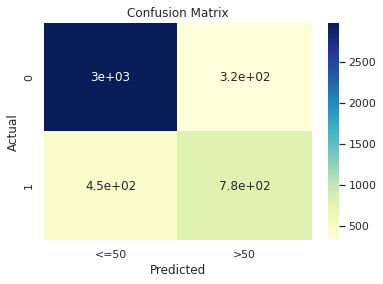

<Figure size 1080x576 with 0 Axes>

In [503]:
ax= plt.subplot()
plt.figure(figsize=(15,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax, cmap = "YlGnBu")

# labels, title and ticks
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_title("Confusion Matrix") 
ax.xaxis.set_ticklabels(["<=50", ">50"])
plt.show()

# Gradient Boosting Classifier

In [504]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train.values.ravel())
y_pred=gb.predict(X_test)

In [505]:
print('Accuracy is ',accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
cm=confusion_matrix(y_test,y_pred)
cm

Accuracy is  0.8509933774834437
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      3300
           1       0.78      0.62      0.69      1230

    accuracy                           0.85      4530
   macro avg       0.83      0.78      0.80      4530
weighted avg       0.85      0.85      0.85      4530



array([[3090,  210],
       [ 465,  765]])

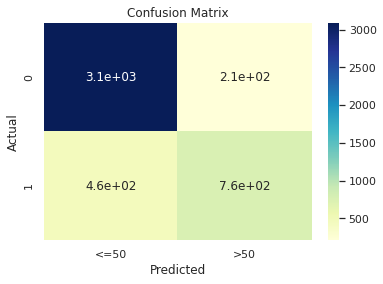

<Figure size 1080x576 with 0 Axes>

In [506]:
ax= plt.subplot()
plt.figure(figsize=(15,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax, cmap = "YlGnBu")

# labels, title and ticks
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_title("Confusion Matrix") 
ax.xaxis.set_ticklabels(["<=50", ">50"])
plt.show()

# Extreeme Gradient Boosting Classifier

In [507]:
from xgboost import XGBClassifier
xgb=XGBClassifier()
xgb.fit(X_train,y_train.values.ravel())
y_pred=xgb.predict(X_test)

In [508]:
print('Accuracy is ',accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
cm=confusion_matrix(y_test,y_pred)
cm

Accuracy is  0.8470198675496688
              precision    recall  f1-score   support

           0       0.87      0.94      0.90      3300
           1       0.78      0.61      0.68      1230

    accuracy                           0.85      4530
   macro avg       0.82      0.77      0.79      4530
weighted avg       0.84      0.85      0.84      4530



array([[3089,  211],
       [ 482,  748]])

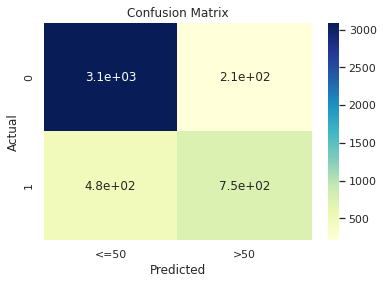

<Figure size 1080x576 with 0 Axes>

In [509]:
ax= plt.subplot()
plt.figure(figsize=(15,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax, cmap = "YlGnBu")

# labels, title and ticks
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_title("Confusion Matrix") 
ax.xaxis.set_ticklabels(["<=50", ">50"])
plt.show()

# Naive Bayes Classifier

In [510]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()
nb.fit(X_train, y_train.values.ravel())
y_pred = nb.predict(X_test)

In [511]:
print('Accuracy is ',accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
cm=confusion_matrix(y_test,y_pred)
cm

Accuracy is  0.7920529801324503
              precision    recall  f1-score   support

           0       0.81      0.94      0.87      3300
           1       0.70      0.40      0.51      1230

    accuracy                           0.79      4530
   macro avg       0.76      0.67      0.69      4530
weighted avg       0.78      0.79      0.77      4530



array([[3091,  209],
       [ 733,  497]])

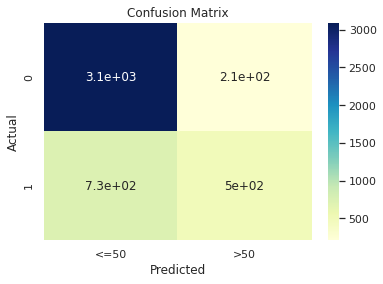

<Figure size 1080x576 with 0 Axes>

In [512]:
ax= plt.subplot()
plt.figure(figsize=(15,8))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, ax = ax, cmap = "YlGnBu")

# labels, title and ticks
ax.set_xlabel("Predicted")
ax.set_ylabel("Actual")
ax.set_title("Confusion Matrix") 
ax.xaxis.set_ticklabels(["<=50", ">50"])
plt.show()

# **Gradient boosting is best algorithm**

In [513]:
gb=GradientBoostingClassifier()
gb.fit(X_train,y_train.values.ravel())

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [514]:
gb=GradientBoostingClassifier(max_depth=5,n_estimators=130,random_state=10,max_features='auto',min_samples_split=2,learning_rate=0.1,
                              min_samples_leaf=1,subsample=1.0)
gb.fit(X_train,y_train.values.ravel())
y_pred=gb.predict(X_test)
print('Accuracy is ',accuracy_score(y_test,y_pred))
print(classification_report(y_test, y_pred))
cm=confusion_matrix(y_test,y_pred)
cm

Accuracy is  0.8591611479028698
              precision    recall  f1-score   support

           0       0.88      0.93      0.91      3300
           1       0.79      0.66      0.72      1230

    accuracy                           0.86      4530
   macro avg       0.83      0.80      0.81      4530
weighted avg       0.86      0.86      0.86      4530



array([[3081,  219],
       [ 419,  811]])

In [515]:
parameters = {
    "loss":["deviance"],
    "learning_rate": [0.01, 0.025, 0.05, 0.075, 0.1, 0.15, 0.2],
    "min_samples_split": np.linspace(0.1, 0.5, 12),
    "min_samples_leaf": np.linspace(0.1, 0.5, 12),
    "max_depth":[5],
    "max_features":["log2","sqrt"],
    "subsample":[0.5, 0.618, 0.8, 0.85, 0.9, 0.95, 1.0],
    "n_estimators":[130]
    }

In [516]:
from sklearn.model_selection import GridSearchCV
grid_search = GridSearchCV(gb, parameters,cv=5,n_jobs=-1)

In [ ]:
grid_search.fit(X_train,y_train.values.ravel())
#taking too much time,so quits here

In [ ]:
print(grid_search.score(trainX, trainY))
print(grid_search.best_params_)
